<a href="https://colab.research.google.com/github/18cse066/DMDW/blob/main/Dissimilarity_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [11]:
df=pd.read_csv("https://raw.githubusercontent.com/18cse066/DMDW/main/cwurData.csv")

In [12]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


proximity measures of binary attributes

In [13]:
df1=df[['world_rank','institution','country','national_rank','quality_of_education','alumni_employment','quality_of_faculty','publications']]

In [14]:
df1.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications
0,1,Harvard University,USA,1,7,9,1,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12
2,3,Stanford University,USA,3,17,11,5,4
3,4,University of Cambridge,United Kingdom,1,10,24,4,16
4,5,California Institute of Technology,USA,4,2,29,7,37


In [15]:
df1=df1.replace("no",0)
df1=df1.replace("yes",1)

In [16]:
df1.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications
0,1,Harvard University,USA,1,7,9,1,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12
2,3,Stanford University,USA,3,17,11,5,4
3,4,University of Cambridge,United Kingdom,1,10,24,4,16
4,5,California Institute of Technology,USA,4,2,29,7,37


In [20]:
n=np.array(df1[['national_rank','quality_of_education']])
n=n.reshape(-1,2)
n.shape

(2200, 2)

In [25]:
m=np.array(df1[['quality_of_faculty','publications']])
m=m.reshape(-1,2)
m.shape

(2200, 2)

In [26]:
from scipy.spatial import distance
dist_matrix=distance.cdist(n,m)
print(dist_matrix)

[[  6.           5.38516481   5.         ... 851.12748751 905.38941898
  881.13846812]
 [  8.06225775   3.16227766   5.83095189 ... 848.93874926 903.20817091
  878.95392371]
 [ 16.1245155    5.          13.15294644 ... 840.94827427 895.20165326
  870.95407456]
 ...
 [366.39459603 355.31676009 363.23270778 ... 504.35007683 556.20230133
  532.95027911]
 [368.07200383 356.92296088 364.68342436 ... 496.03729698 548.67567834
  525.0904684 ]
 [375.07332616 363.90245946 371.28560435 ... 482.28000166 536.27045416
  512.11424507]]


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

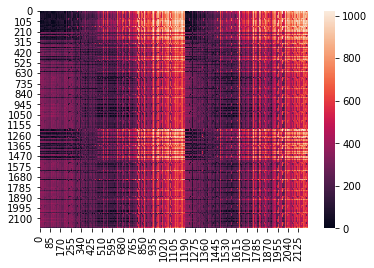

In [28]:
sns.heatmap(dist_matrix)
plt.show()

In [29]:
## nominal attribute

In [30]:
nominal=df[['country','citations','broad_impact','patents']]
nominal=nominal.replace('United Kingdom','UK')
nominal=(nominal.astype('category'))

In [32]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['country']=lb.fit_transform(nominal['country'])
nominal['citations']=lb.fit_transform(nominal['citations'])
nominal['broad_impact']=lb.fit_transform(nominal['broad_impact'])
nominal['patents']=lb.fit_transform(nominal['patents'])

In [33]:
nominal.head()

,country,citations,broad_impact,patents
0,55,0,542,4
1,55,3,408,0
2,55,1,407,14
3,54,10,406,49
4,55,21,405,17


In [37]:
nominal1=np.array(nominal)
nominal1.reshape(-1,2)
nominal2=np.array(nominal)
nominal2.reshape(-1,2)

array([[ 55,   0],
       [542,   4],
       [ 55,   3],
       ...,
       [331, 633],
       [  8, 134],
       [333, 542]])

In [38]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nominal1,nominal2)
print(dist_matrix)

[[  0.         134.09325114 135.37355724 ... 772.34642486 676.88034393
  594.38203203]
 [134.09325114   0.          14.17744688 ... 750.31993176 651.020737
  564.58746001]
 [135.37355724  14.17744688   0.         ... 736.9036572  637.71074948
  551.50521303]
 ...
 [772.34642486 750.31993176 736.9036572  ...   0.         109.25200227
  191.05234885]
 [676.88034393 651.020737   637.71074948 ... 109.25200227   0.
   99.4233373 ]
 [594.38203203 564.58746001 551.50521303 ... 191.05234885  99.4233373
    0.        ]]


<function matplotlib.pyplot.show>

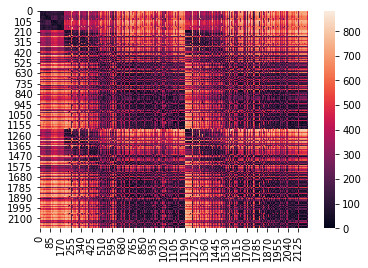

In [39]:
sns.heatmap(dist_matrix)
plt.show